In [1]:
!pip install transformers pandas

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming depe

In [2]:
import os
import glob
import pandas as pd

# Path to the directory containing your CSV files
folder_path = 'cleaned'

# List all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Check if there are any CSV files
if not csv_files:
    print(f"No CSV files found in {folder_path}.")
    exit()

# Initialize an empty list to hold the dataframes
dataframes = []

# Iterate over each CSV file, read it as a dataframe, and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Path and filename for the merged CSV file
merged_csv_path = 'C:/Users/2003v/Downloads/semtiment/preprocess/output.csv'

# Write the merged dataframe to a new CSV file
merged_df.to_csv(merged_csv_path, index=False)

print(f"Merged CSV file saved to {merged_csv_path}.")


Merged CSV file saved to C:/Users/2003v/Downloads/semtiment/preprocess/output.csv.


In [ ]:

import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [1]:
import zipfile
import pandas as pd
import io

with zipfile.ZipFile('cleaned.zip', 'r') as zip_ref:
    dfs = []
    for file_name in zip_ref.namelist():
        print(file_name)
        if "_MACOSX" in file_name:
            continue
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as csv_file:
                df = pd.read_csv(io.TextIOWrapper(csv_file))
                dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df


cleaned/__MACOSX/
cleaned/__MACOSX/cleaned/
cleaned/__MACOSX/cleaned/._adani enterprises limited.csv
cleaned/__MACOSX/cleaned/._bajaj finserv limited.csv
cleaned/__MACOSX/cleaned/._hero motocorp limited.csv
cleaned/__MACOSX/cleaned/._tech mahindra limited.csv
cleaned/cleaned/
cleaned/cleaned/adani enterprises limited.csv


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 44098: character maps to <undefined>

In [ ]:
merged_df = merged_df[['DETAILS', 'Sentiment']]

In [ ]:
data = merged_df
data.head()

,DETAILS,Sentiment
0,please find attached the transcript of the ear...,-1
1,please find enclosed herewith the press releas...,-1
2,please find enclosed a specimen of the e-mail ...,0
3,please find enclosed herewith a copy of the pr...,0
4,the board of directors at its meeting held tod...,0


In [ ]:
X = data['DETAILS']
y = data['Sentiment']

In [ ]:
len(X)

100

In [ ]:
y.value_counts()

Sentiment
 0    89
 1     7
-1     4
Name: count, dtype: int64

In [ ]:
data.shape

(100, 2)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
!pip install tqdm


In [ ]:

from tqdm import tqdm
import torch
import scipy.special

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}

for x in tqdm(X):
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
            k: v
            for k, v in zip(
                model.config.id2label.values(),
                scipy.special.softmax(logits.numpy().squeeze()),
            )
        }
        sentimentFinbert = max(scores, key=scores.get)
        probabilityFinbert = max(scores.values())
        preds.append(sentimentFinbert)
        preds_proba.append(probabilityFinbert)


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


In [ ]:
X

0        please find attached the transcript of the ear...
1        please find enclosed herewith the press releas...
2        please find enclosed a specimen of the e-mail ...
3        please find enclosed herewith a copy of the pr...
4        the board of directors at its meeting held tod...
                               ...                        
34145     regarding a press release vide its letter dat...
34146    munish mittal had informed the exchange regard...
34147    hdfc bank limited had informed the exchange re...
34148     regarding a press release dated july 19, 2010...
34149     that the board of directors of the bank has, ...
Name: DETAILS, Length: 34150, dtype: object

In [ ]:
Y1 = []
for sentiment1 in y:
    if sentiment1 == '1':
        Y1.append("positive")
    elif sentiment1 == '0':
        Y1.append("neutral")
    else:
        Y1.append("negative")

In [ ]:
Y1[0]='negative'

In [ ]:
print(f'Accuracy-Score: {accuracy_score(Y1, preds)}')

Accuracy-Score: 0.01


In [ ]:
print(classification_report(Y1, preds))

              precision    recall  f1-score   support

    negative       1.00      0.01      0.02       100
     neutral       0.00      0.00      0.00         0

    accuracy                           0.01       100
   macro avg       0.50      0.01      0.01       100
weighted avg       1.00      0.01      0.02       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


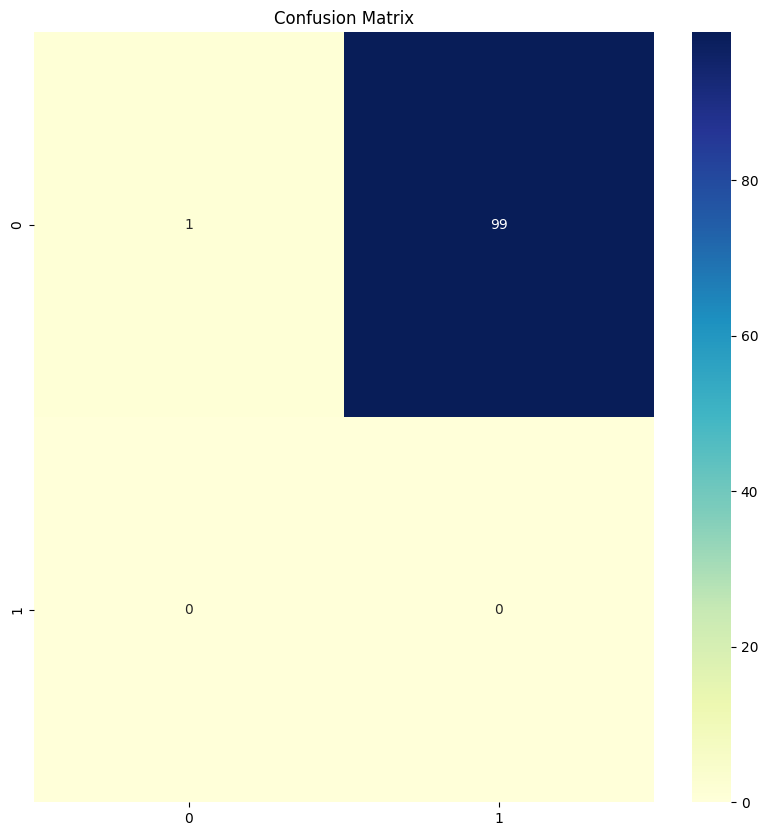

In [ ]:
cm = confusion_matrix(Y1, preds)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.show()